# Simple Linear Regression model with Python and scikit-learn

# To Explore Supervised Machine Learning

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. 

This is a simple linear
regression task as it involves just two variables.

# Data

Data pertaining to given use case is present at : http://bit.ly/w-data

The dataset contains only two columns "Hours" and "Scores"

"Hours" is our independent variable whereas,
"Scores" is our dependent variable

# Problem Statement


What will be predicted score if a student study for 9.25 hrs in a
day?

In [1]:
# importing neccessary libraries 
import pandas as pd # library to handle data in a vectorized manne

import numpy as np # library for data analsysis

from sklearn.linear_model import LinearRegression 

from sklearn.model_selection import train_test_split # to create test and train dataset

from sklearn import metrics # for model evaluation

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading data from remote link
df = pd.read_csv("http://bit.ly/w-data")

print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Creating a scatter plot between "Hours" and "Scores" to  visualize the distribution of data.

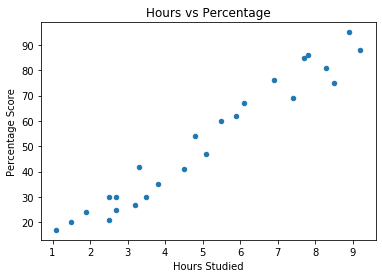

In [5]:
df.plot("Hours","Scores",kind='scatter',style='o')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Hours vs Percentage')
plt.savefig('plot.jpg')
plt.show()

**From above scatter plot we can clearly see that there is a strong positive correletion between hours a student studies to what score he/she receives. So it is evident that we can use "Hours" column as an independent variable to predict "Scores".**

Also to quantify the observation that we made above we can use corr function to find the correlation value between "Hours" and "Scores"

In [4]:
# using corr() function
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [5]:
print("Value of correlation between Hours and Scores:",0.976197)

Value of correlation between Hours and Scores: 0.976197


# Preparing Data

Now we are going to separate our data into "features set"(input) and "labels set"(output)

In [6]:
x = df.iloc[:,:-1].values  
y = df.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x ,y ,test_size = 0.2,random_state = 0)

# Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [8]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

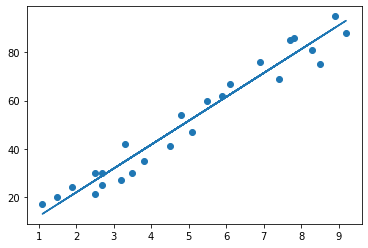

In [9]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [10]:
# parameters of the best fitted line
print("Slope :",model.coef_[0].round(2))
print("Intercept :",model.intercept_.round(2))

Slope : 9.91
Intercept : 2.02


# Equation of our model

**scores = intercept + slope(Hours)**

**scores = 2.02 + 9.91(Hours)**

## Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [11]:
print(x_test) # Testing data - In Hours
pred = model.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
# You can also test with your own data
hours = [[9.25]]
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [14]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, pred))

Mean Absolute Error: 4.183859899002975


In [15]:
# saving our model in the pickle file
import pickle
pickle_out = open("linear.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()